# Regression Analysis of Air Quality Data: Predicting Carbon Monoxide Levels

## Setup

In [1]:
# Import required modules
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [2]:
# Read the data
df = pd.read_csv('dataset.csv')
df.head(10)

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind,wind_sp,date,carb_monox
0,23,13.0,43.0,1.0,19.0,29.0000,7.6,1021.3,0.0,NNW,2.5,23-Oct-2014,200.000
1,21,77.0,115.0,31.0,74.0,10.0000,0.0,1015.0,0.0,W,0.7,9-Jan-2016,2100.000
2,21,86.0,141.0,9.0,43.0,198.0000,29.3,1000.9,0.0,SSE,0.4,11-Jul-2016,700.000
3,11,NaN,NaN,NaN,NaN,20.0000,14.2,1015.2,0.0,ESE,1.9,29-Oct-2015,1222.923
4,0,77.0,57.0,41.0,48.0,16.0000,-1.0,1024.2,0.0,SSW,1.3,7-Feb-2015,1300.000
5,9,NaN,NaN,NaN,NaN,NaN,-5.1,1026.0,0.0,ENE,0.8,20-Dec-2015,1222.923
6,19,104.0,104.0,2.0,18.0,158.0000,27.4,996.8,0.0,E,1.3,20-Jul-2016,800.000
7,21,6.0,6.0,4.0,13.0,69.0000,0.7,1022.7,0.0,NE,2.4,22-Dec-2017,200.000
8,1,78.0,113.0,6.0,54.0,67.6872,25.1,996.6,0.0,NNW,0.8,4-Aug-2014,1222.923
9,5,81.0,26.0,8.0,36.0,2.0000,19.1,999.3,0.4,NNW,1.4,9-Jun-2014,1500.000


## EDA & Data Preprocessing

In [3]:
# Let's Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        14000 non-null  int64  
 1   small_part  13668 non-null  float64
 2   med_part    13749 non-null  float64
 3   sulf_diox   13691 non-null  float64
 4   nitr_diox   13662 non-null  float64
 5   trioxygen   13563 non-null  float64
 6   temp        13985 non-null  float64
 7   pres        13986 non-null  float64
 8   rain        13985 non-null  float64
 9   wind        13955 non-null  object 
 10  wind_sp     13989 non-null  float64
 11  date        14000 non-null  object 
 12  carb_monox  14000 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 1.4+ MB


In [4]:
# Basic statistics of the data
df.describe(include='all')

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind,wind_sp,date,carb_monox
count,14000.000000,13668.000000,13749.000000,13691.000000,13662.000000,13563.000000,13985.000000,13986.000000,13985.000000,13955,13989.000000,14000,14000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1461,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,22-Jan-2015,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1381,NaN,20,NaN
mean,11.622429,78.745237,103.551407,16.060271,52.454812,57.334871,13.758687,1009.740036,0.067265,NaN,1.756351,NaN,1233.604101
std,6.935469,80.126449,91.394438,21.762748,35.094642,56.569558,11.427620,10.529981,0.815876,NaN,1.238664,NaN,1174.657678
min,0.000000,2.000000,2.000000,0.285600,2.000000,0.214200,-15.900000,982.400000,0.000000,NaN,0.000000,NaN,100.000000
25%,6.000000,20.000000,35.000000,3.000000,25.000000,11.000000,3.300000,1001.000000,0.000000,NaN,0.900000,NaN,500.000000
50%,12.000000,53.000000,79.000000,7.996800,44.980350,45.000000,14.800000,1009.400000,0.000000,NaN,1.400000,NaN,900.000000
75%,18.000000,110.000000,144.000000,19.000000,73.000000,81.590900,23.400000,1018.000000,0.000000,NaN,2.200000,NaN,1400.000000


### Missing Values

In [5]:
# Evaluate missing values
print("total number of NaN is: ",df.isnull().values.sum())
print(df.isnull().sum())

total number of NaN is:  1767
hour            0
small_part    332
med_part      251
sulf_diox     309
nitr_diox     338
trioxygen     437
temp           15
pres           14
rain           15
wind           45
wind_sp        11
date            0
carb_monox      0
dtype: int64


In [6]:
df.head(6)

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind,wind_sp,date,carb_monox
0,23,13.0,43.0,1.0,19.0,29.0,7.6,1021.3,0.0,NNW,2.5,23-Oct-2014,200.000
1,21,77.0,115.0,31.0,74.0,10.0,0.0,1015.0,0.0,W,0.7,9-Jan-2016,2100.000
2,21,86.0,141.0,9.0,43.0,198.0,29.3,1000.9,0.0,SSE,0.4,11-Jul-2016,700.000
3,11,NaN,NaN,NaN,NaN,20.0,14.2,1015.2,0.0,ESE,1.9,29-Oct-2015,1222.923
4,0,77.0,57.0,41.0,48.0,16.0,-1.0,1024.2,0.0,SSW,1.3,7-Feb-2015,1300.000
5,9,NaN,NaN,NaN,NaN,NaN,-5.1,1026.0,0.0,ENE,0.8,20-Dec-2015,1222.923


Dealing with missing values: We can try both replacing and removing to see which works better. Since the number of missing values is not significant (relative to the size of dataset), removing them could be a viable option. Else, we can replace them with the mean of the variable (for numerical variables), or the most frequent category (for categorical variables)

In [7]:
# Let's first select the numerical variables
numerical_columns = df.select_dtypes(include=['number']).columns

# Now we can replace the missing values of each variable with the mean of that variable
# Only a small portion of data is missing, so replacing them with mean is simple and will not significantly affect the overall distribution of data
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
df.head(6)

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind,wind_sp,date,carb_monox
0,23,13.000000,43.000000,1.000000,19.000000,29.000000,7.6,1021.3,0.0,NNW,2.5,23-Oct-2014,200.000
1,21,77.000000,115.000000,31.000000,74.000000,10.000000,0.0,1015.0,0.0,W,0.7,9-Jan-2016,2100.000
2,21,86.000000,141.000000,9.000000,43.000000,198.000000,29.3,1000.9,0.0,SSE,0.4,11-Jul-2016,700.000
3,11,78.745237,103.551407,16.060271,52.454812,20.000000,14.2,1015.2,0.0,ESE,1.9,29-Oct-2015,1222.923
4,0,77.000000,57.000000,41.000000,48.000000,16.000000,-1.0,1024.2,0.0,SSW,1.3,7-Feb-2015,1300.000
5,9,78.745237,103.551407,16.060271,52.454812,57.334871,-5.1,1026.0,0.0,ENE,0.8,20-Dec-2015,1222.923


We also have missing values in one of the categorical variables. The number of missing values in "Wind" is quite small so how we handle it will not have a significant impact. The missing values are most likely related to days that were not windy, so we can replace them with 'NoWind'. Other methods like removing, or replacing by most frequent can be tried as well. But since the frequency of categories are not very different, most frequent will probably not be ideal

In [8]:
value1 = {'wind': 'No'}
df = df.fillna(value=value1)

df['wind'].value_counts()

wind
NE     1381
NNW    1234
N      1169
NW     1085
ENE    1042
E      1028
ESE     941
SW      925
NNE     856
WNW     777
SSW     635
SE      618
WSW     605
SSE     594
S       582
W       483
No       45
Name: count, dtype: int64

In [9]:
# Let's check if missing values are replaced
print("total number of NaN is: ",df.isnull().values.sum())
print(df.isnull().sum())

total number of NaN is:  0
hour          0
small_part    0
med_part      0
sulf_diox     0
nitr_diox     0
trioxygen     0
temp          0
pres          0
rain          0
wind          0
wind_sp       0
date          0
carb_monox    0
dtype: int64


### Exploration & Visualization

Let's make some visualizations and delve into the dataset to gain a deeper understanding of its characteristics, uncover potential patterns, and identify trends that may inform the subsequent analyses.

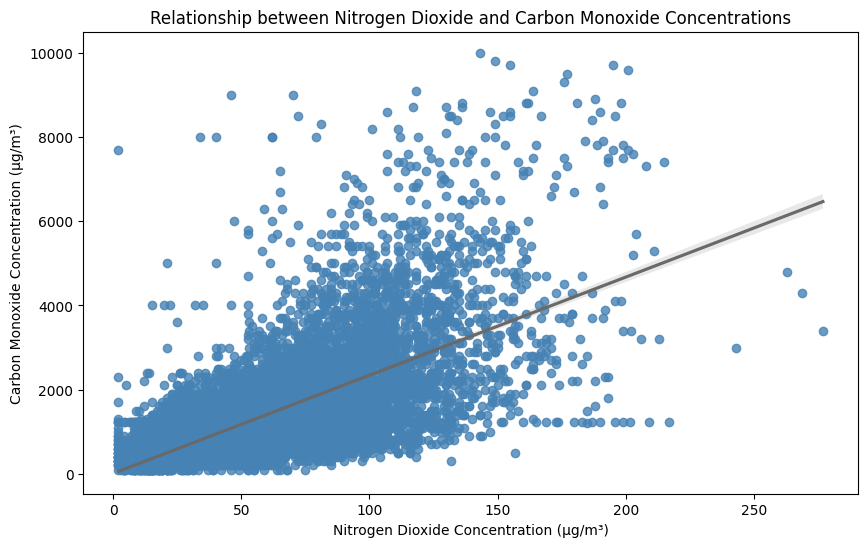

In [10]:
# Let's create a scatter plot and add a regression line to visualize the relationship between the variables and estimate the trend.

plt.figure(figsize=(10,6))
sns.regplot(x='nitr_diox', y='carb_monox', data=df, scatter_kws={'color': 'steelblue'}, line_kws={'color': 'dimgray'})
plt.title('Relationship between Nitrogen Dioxide and Carbon Monoxide Concentrations')
plt.xlabel('Nitrogen Dioxide Concentration (μg/m³)')
plt.ylabel('Carbon Monoxide Concentration (μg/m³)')
plt.show()

# We can more or less see a trend, this variable could possibly improve our predictive model so we should test it

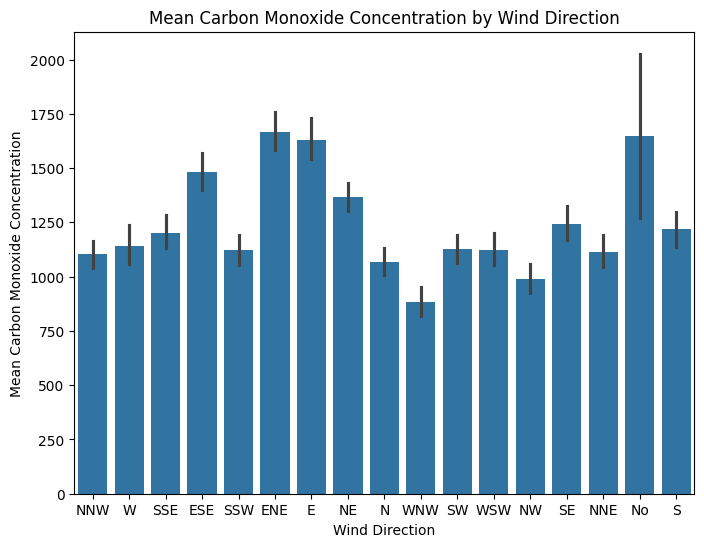

In [11]:
# We can also visualize the relationship of categorical variables with the target to see if they could be potential predictors for our model

plt.figure(figsize=(8, 6))
sns.barplot(x='wind', y='carb_monox', data=df)
plt.xlabel('Wind Direction')
plt.ylabel('Mean Carbon Monoxide Concentration')
plt.title('Mean Carbon Monoxide Concentration by Wind Direction')
plt.show()

# Different categories in the variable 'wind' show a slightly different mean of 'carb_monox', so this variable might be a good predictor

In [12]:
# Moreover, we can compute the correlation to measure which variables could be good predictors
correl = df[['hour', 'small_part', 'med_part', 'sulf_diox', 'nitr_diox', 'trioxygen', 'temp', 'pres', 'rain', 'wind_sp', 'carb_monox']].corr().round(2) 

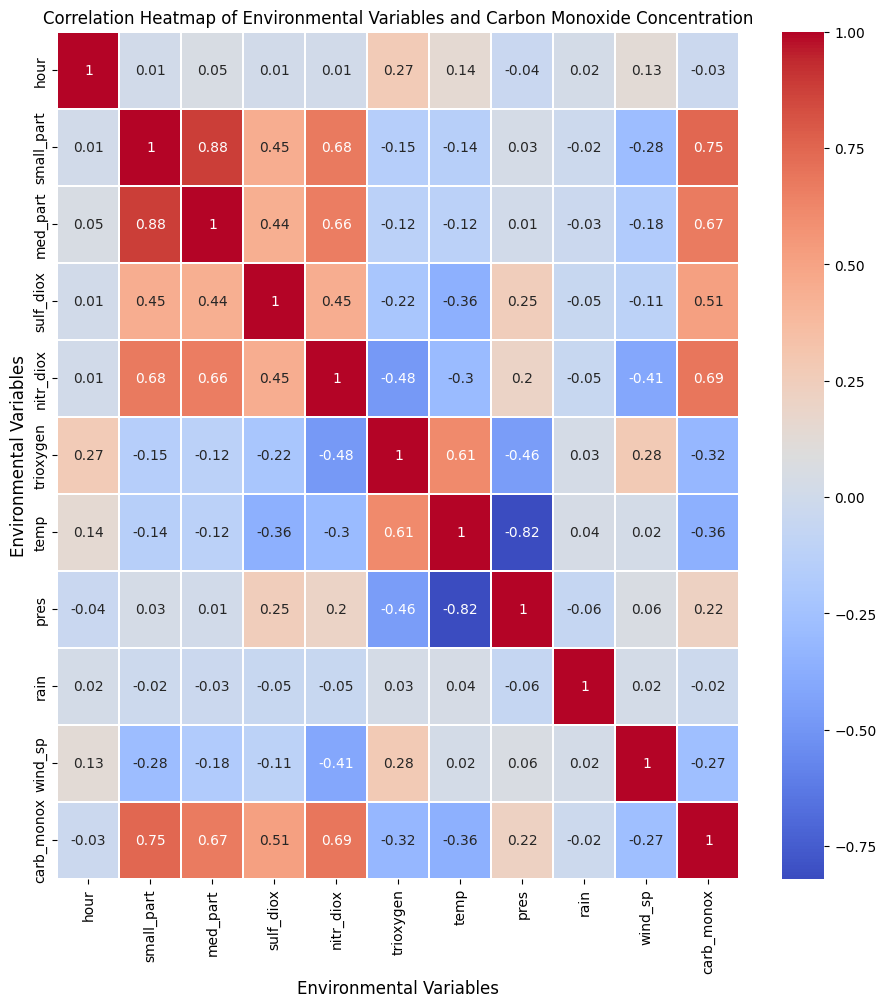

In [13]:
#We can visualise the correlation using a heatmap
plt.figure(figsize = (11,11))
sns.heatmap(data=correl, cmap='coolwarm', linewidths=.3, annot=True, annot_kws={"size":10})
plt.title('Correlation Heatmap of Environmental Variables and Carbon Monoxide Concentration')
plt.xlabel('Environmental Variables', size=12)
plt.ylabel('Environmental Variables', size=12)
plt.show()

# Some variables show high correlation, we should make sure to include those in our model training
# For example, small_part, med_part, sulf_diox, and nitr_diox show a high positive correlation with the target variable
# While troxygen abd temp show a medium negative correlation


**Considerations:**

We can see that some predictor variables have high correlation with each other. For example 'small_part' and 'med_part' variables show a very high positive correlation. Thich can lead to issues such as:

- Multicollinearity: Multicollinearity occurs when predictor variables in a regression model are highly correlated with each other. This can inflate the standard errors of the regression coefficients and reduce the precision of the estimates. It can also make it difficult to interpret the individual effects of each predictor on the target variable.

- Redundancy: Highly correlated variables may contain redundant information. Including redundant variables in a predictive model does not necessarily improve its performance and may lead to overfitting.

- Model Complexity: Including highly correlated variables in a model increases its complexity without necessarily improving its predictive power. This can make the model harder to interpret and may decrease its generalization performance on unseen data.

To address high correlation among predictor variables, we can consider the following approaches:

- Feature Selection: We can identify and select a subset of variables that are most relevant and informative for predicting the target variable.

- Dimensionality Reduction: We can use techniques such as principal component analysis (PCA) to reduce the dimensionality of the feature space while preserving most of the information.

- Regularization: Regularized regression techniques such as ridge regression and lasso regression can automatically handle multicollinearity by penalizing large coefficients and shrinking them towards zero. So those techniques will definitely be considered in the next steps!


### Categorical variables conversion

In [14]:
# First, we have a categorical variable that needs to be converted to datetime
df = df.replace(to_replace = '29-Feb-2017', value ='28-Feb-2017') # this date does not exist, it is creating problems so it is replaced
df['date'] = pd.to_datetime(df['date'])
print(df[['date']].dtypes)
df.head()


date    datetime64[ns]
dtype: object


,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind,wind_sp,date,carb_monox
0,23,13.000000,43.000000,1.000000,19.000000,29.0,7.6,1021.3,0.0,NNW,2.5,2014-10-23,200.000
1,21,77.000000,115.000000,31.000000,74.000000,10.0,0.0,1015.0,0.0,W,0.7,2016-01-09,2100.000
2,21,86.000000,141.000000,9.000000,43.000000,198.0,29.3,1000.9,0.0,SSE,0.4,2016-07-11,700.000
3,11,78.745237,103.551407,16.060271,52.454812,20.0,14.2,1015.2,0.0,ESE,1.9,2015-10-29,1222.923
4,0,77.000000,57.000000,41.000000,48.000000,16.0,-1.0,1024.2,0.0,SSW,1.3,2015-02-07,1300.000


In [15]:
df_numerical = pd.get_dummies(df)
df_numerical.head()

,hour,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,wind_sp,...,wind_NW,wind_No,wind_S,wind_SE,wind_SSE,wind_SSW,wind_SW,wind_W,wind_WNW,wind_WSW
0,23,13.000000,43.000000,1.000000,19.000000,29.0,7.6,1021.3,0.0,2.5,...,False,False,False,False,False,False,False,False,False,False
1,21,77.000000,115.000000,31.000000,74.000000,10.0,0.0,1015.0,0.0,0.7,...,False,False,False,False,False,False,False,True,False,False
2,21,86.000000,141.000000,9.000000,43.000000,198.0,29.3,1000.9,0.0,0.4,...,False,False,False,False,True,False,False,False,False,False
3,11,78.745237,103.551407,16.060271,52.454812,20.0,14.2,1015.2,0.0,1.9,...,False,False,False,False,False,False,False,False,False,False
4,0,77.000000,57.000000,41.000000,48.000000,16.0,-1.0,1024.2,0.0,1.3,...,False,False,False,False,False,True,False,False,False,False


In [16]:
# Let's rearrange columns for convenience
cols = list(df_numerical.columns.values) #helps to get all the column names
df_numerical = df_numerical[['hour','date','small_part','med_part','sulf_diox','nitr_diox','trioxygen','temp','pres','rain',
                              'wind_sp','wind_E','wind_ENE','wind_ESE','wind_N','wind_NE','wind_NNE','wind_NNW','wind_NW',
                             'wind_S','wind_SE','wind_SSE','wind_SSW','wind_SW','wind_W','wind_WNW','wind_WSW','wind_No',
                             'carb_monox']]

df_numerical.head()

,hour,date,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,...,wind_S,wind_SE,wind_SSE,wind_SSW,wind_SW,wind_W,wind_WNW,wind_WSW,wind_No,carb_monox
0,23,2014-10-23,13.000000,43.000000,1.000000,19.000000,29.0,7.6,1021.3,0.0,...,False,False,False,False,False,False,False,False,False,200.000
1,21,2016-01-09,77.000000,115.000000,31.000000,74.000000,10.0,0.0,1015.0,0.0,...,False,False,False,False,False,True,False,False,False,2100.000
2,21,2016-07-11,86.000000,141.000000,9.000000,43.000000,198.0,29.3,1000.9,0.0,...,False,False,True,False,False,False,False,False,False,700.000
3,11,2015-10-29,78.745237,103.551407,16.060271,52.454812,20.0,14.2,1015.2,0.0,...,False,False,False,False,False,False,False,False,False,1222.923
4,0,2015-02-07,77.000000,57.000000,41.000000,48.000000,16.0,-1.0,1024.2,0.0,...,False,False,False,True,False,False,False,False,False,1300.000


### Feature Engineering

We can create new features that might be helpful for our regression models. This can be done in many different ways. For example we can create new features like year, month, day, week day, day of year, or even unix timestamp. In the context of regression modeling or time-series analysis, Unix timestamps can be quite useful. They provide a straightforward way to represent temporal information, allowing us to capture patterns and trends in our data over time. For example we can use Unix timestamps as features in our regression models to account for temporal dependencies and seasonality.

However, there are some consderations that should be taken into account when creating new features:
- Some of these features may contain redundant information. For example, day of week and day of year might capture similar temporal patterns. In such cases, including both features may not provide additional useful information and could potentially worsen the performance of the model due to multicollinearity.
- Adding more features increases the dimensionality of the feature space, which can lead to overfitting if the number of observations is limited. 
- Techniques like Ridge regression or Lasso regression can help mitigate multicollinearity and overfitting by penalizing large coefficients or eliminating less important features.

So it's essential to carefully engineer features and select those that are most relevant to the regression task. We may consider techniques such as dimensionality reduction methods (e.g., PCA) to identify and retain only the most informative features.


In summary, it's important to remember that creating predictive models is an iterative process. Experimentation and validation with appropriate evaluation metrics are key to determining the optimal feature set for our regression model, so we will be testing different feature sets to see which ones would lead to better results!


In [17]:
# Converting a Date Object into Unix Timestamp, this seems to provide better results in the end
for i in range (14000): #the function works on single values and not on series, so we do them one by one using a for loop
    df_numerical['date'][i]=int(datetime.timestamp(df_numerical['date'][i]))

df_numerical['date'] = pd.to_numeric(df_numerical['date'])

C:\Users\r94ha\AppData\Local\Temp\ipykernel_15604\1344984501.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1414018800' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_numerical['date'][i]=int(datetime.timestamp(df_numerical['date'][i]))


In [18]:
# Alternative features:

#df_numerical['year'] = df_numerical['date'].dt.year
#df_numerical['month'] = df_numerical['date'].dt.month
#df_numerical['day'] = df_numerical['date'].dt.day
#df_numerical['weekday'] = df_numerical['date'].dt.weekday
#df_numerical = df_numerical.drop(['date'], axis=1)


In [19]:
df_numerical.head()

,hour,date,small_part,med_part,sulf_diox,nitr_diox,trioxygen,temp,pres,rain,...,wind_S,wind_SE,wind_SSE,wind_SSW,wind_SW,wind_W,wind_WNW,wind_WSW,wind_No,carb_monox
0,23,1414018800,13.000000,43.000000,1.000000,19.000000,29.0,7.6,1021.3,0.0,...,False,False,False,False,False,False,False,False,False,200.000
1,21,1452297600,77.000000,115.000000,31.000000,74.000000,10.0,0.0,1015.0,0.0,...,False,False,False,False,False,True,False,False,False,2100.000
2,21,1468191600,86.000000,141.000000,9.000000,43.000000,198.0,29.3,1000.9,0.0,...,False,False,True,False,False,False,False,False,False,700.000
3,11,1446076800,78.745237,103.551407,16.060271,52.454812,20.0,14.2,1015.2,0.0,...,False,False,False,False,False,False,False,False,False,1222.923
4,0,1423267200,77.000000,57.000000,41.000000,48.000000,16.0,-1.0,1024.2,0.0,...,False,False,False,True,False,False,False,False,False,1300.000


In [20]:
df_numerical = df_numerical.astype('float64')

In [21]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hour        14000 non-null  float64
 1   date        14000 non-null  float64
 2   small_part  14000 non-null  float64
 3   med_part    14000 non-null  float64
 4   sulf_diox   14000 non-null  float64
 5   nitr_diox   14000 non-null  float64
 6   trioxygen   14000 non-null  float64
 7   temp        14000 non-null  float64
 8   pres        14000 non-null  float64
 9   rain        14000 non-null  float64
 10  wind_sp     14000 non-null  float64
 11  wind_E      14000 non-null  float64
 12  wind_ENE    14000 non-null  float64
 13  wind_ESE    14000 non-null  float64
 14  wind_N      14000 non-null  float64
 15  wind_NE     14000 non-null  float64
 16  wind_NNE    14000 non-null  float64
 17  wind_NNW    14000 non-null  float64
 18  wind_NW     14000 non-null  float64
 19  wind_S      14000 non-nul

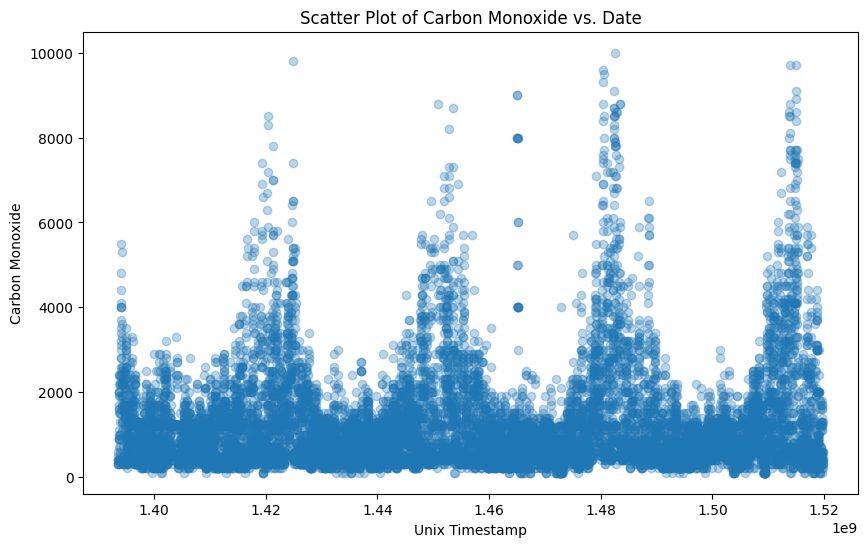

In [22]:
# Let's see if the timestamp feature shows any relationship with our target variable

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_numerical['date'], df_numerical['carb_monox'], alpha=0.3)
plt.title('Scatter Plot of Carbon Monoxide vs. Date')
plt.xlabel('Unix Timestamp')
plt.ylabel('Carbon Monoxide')
plt.show()

# We can observe some seasonality, so this feature could probably be a useful predictor

### Data Selection

In [23]:
# Separate explanatory and target variables

y = df_numerical['carb_monox']
X = df_numerical.drop(['carb_monox'], axis=1)
print('X.shape:',X.shape,' & y.shape:',y.shape)



# Here we can choose all or a subset of explanatory variables to see which dataset will lead to better regression results
# The code is provided for convenience so just uncomment the ones you want to give a try

#X = df_numerical.iloc[:,[4,5,10,11,12]] #if I want to use only some variables
#X["trioxygen"] = np.log(X["tryoxygen"]) #if I want to log transform the tryoxygen variable # When we use a linear model, we will get better results with this 
#X = X.drop(['med_part'], axis=1) #if we want to drop some columns
#X = X[['med_part','nitr_diox','trioxygen','temp','month','rain']] #if we want to select a subset of columns

#X.head()
#y.head()

X.shape: (14000, 28)  & y.shape: (14000,)


In [24]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123) # fix random seed for replicability

print('X_train.shape:',X_train.shape,' & y_train.shape:',y_train.shape)
print('X_test.shape:',X_test.shape,' & y_test.shape:',y_test.shape)

X_train.shape: (9800, 28)  & y_train.shape: (9800,)
X_test.shape: (4200, 28)  & y_test.shape: (4200,)


### Scaling

It's generally recommended to perform scaling after splitting the data into training and testing sets. This ensures that information from the testing set does not influence the scaling process, which could lead to overly optimistic performance estimates.

In [25]:
# scaling shows no effects on some regression models like RandomForestRegressor, so this part is not compulsory for all models!


scaler = StandardScaler()
# We don't want the test set to affect the scaling process
scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
# Let's make it a data frame
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns

X_test_scaled = scaler.transform(X_test)
# Let's make it a data frame
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = X_test.columns

### Principal Component Analysis

When performing Principal Component Analysis (PCA), it's common practice to fit the PCA transformation only on the training data and then apply the same transformation to both the training and testing datasets. This ensures that information from the testing set does not influence the PCA transformation, preventing data leakage and providing a more accurate evaluation of the model's performance.

It's generally recommended to perform PCA on the scaled training dataset rather than the dataset that is not scaled. Scaling the data before applying PCA can lead to more meaningful and interpretable results.

C:\Users\r94ha\AppData\Local\Temp\ipykernel_15604\2066447752.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels())


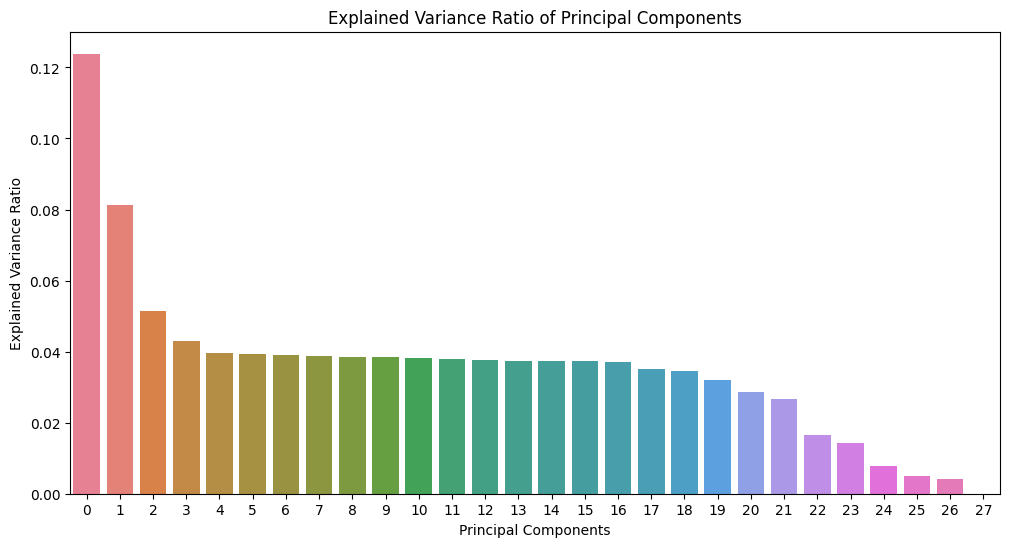

In [26]:
pca = PCA()
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
# Let's make it a data frame
X_train_pca = pd.DataFrame(X_train_pca)

X_test_pca = pca.transform(X_test_scaled)
# Let's make it a data frame
X_test_pca = pd.DataFrame(X_test_pca)

explained_variance=pd.DataFrame(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 6))
ax = sns.barplot( data=explained_variance.transpose())
ax.set_xticklabels(ax.get_xticklabels())
plt.title("Explained Variance Ratio of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.show()

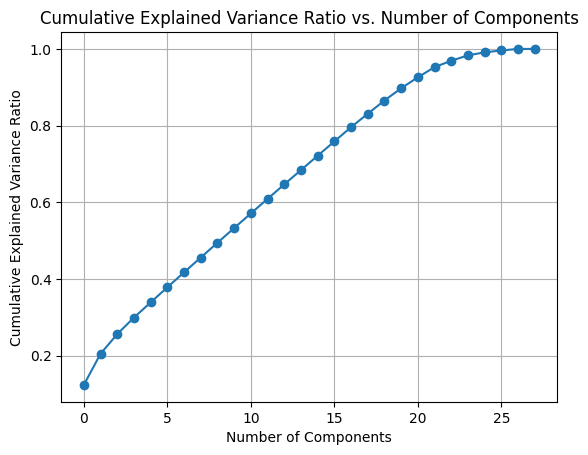

In [27]:
cumulative_variance_ratio = np.cumsum(explained_variance)

plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

When visualizing the cumulative explained variance ratio, we don't observe a clear "elbow" or a significant drop-off. This suggests that the components are contributing fairly evenly to the total variance in the data. This could imply that our data may not have strong underlying structure that can be captured by a small number of principal components. So PCA seems unnecessary!

## Model Training and Evaluation

Here we will develop some regression models!

As there seems to be multicolinearity among some variables, make sure to try different subsets of the dataset to see which leads to better results.

### 1) K Nearest Neighbors Regressor

In [28]:
# Define the regressor and the parameters grid
regressor = KNeighborsRegressor()
parameters = {'n_neighbors': np.arange(1, 10),
              'weights': ['uniform', 'distance'],
              'p': [1, 2]} # 1 for Manhattan distance, 2 for Euclidean distance

# Define the gridsearch
gs = GridSearchCV(regressor, parameters, cv=3, n_jobs = -1) # with no parameters it reduces to a CV

# Train the regressor
gs = gs.fit(X_train_scaled ,y_train) # also try with X_train_scaled and X_train_pca.iloc[:,:2] (depending on the number of components you have chosen)



# Summarize the results of the gridsearch
print('***GRIDSEARCH RESULTS***')
print(f"Best score: {gs.best_score_} using {gs.best_params_}")
#Returns the coefficient of determination R^2 of the prediction.

***GRIDSEARCH RESULTS***
Best score: 0.7320985895944938 using {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}


In [29]:
# Predictions
best_model = gs.best_estimator_
y_train_pred = best_model.predict(X_train_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)
y_pred = best_model.predict(X_test_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)

In [30]:
# we can compare the train/test errors to identify overfitting
print("MAE train: ", metrics.mean_absolute_error(y_train, y_train_pred)) 
print("MSE train: ",metrics.mean_squared_error(y_train, y_train_pred))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2 train: ",metrics.r2_score(y_train, y_train_pred))

print("MAE test: ", metrics.mean_absolute_error(y_test, y_pred)) 
print("MSE test: ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2 test: ",metrics.r2_score(y_test, y_pred))

# Store the values for a later comparison
mae_knn = metrics.mean_absolute_error(y_test, y_pred)
mse_knn = metrics.mean_squared_error(y_test, y_pred)
rmse_knn = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_knn = metrics.r2_score(y_test, y_pred)

# The results suggest overfitting and lack of generalization to unseen data

MAE train:  0.0
MSE train:  0.0
RMSE train:  0.0
r2 train:  1.0
MAE test:  334.13432664636133
MSE test:  360853.5531871222
RMSE test:  600.7108732053401
r2 test:  0.7452437545185948


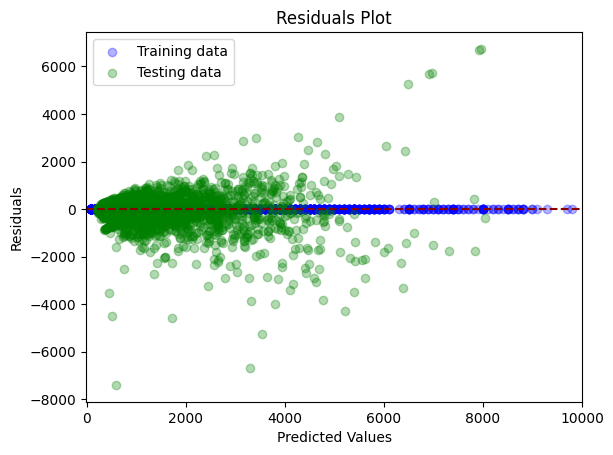

In [31]:
#we can plot the errors

plt.scatter(y_train_pred, y_train_pred-y_train, c="b", label="Training data",alpha=0.3)
plt.scatter(y_pred, y_pred-y_test, c="g", label="Testing data",alpha=0.3)
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=10000, color="darkred", linestyles='--')
plt.xlim([-10,10000])
plt.show()


The divergence of residuals for larger predicted values in the testing data indicates that the model is making larger errors for these observations. This divergence could suggest that the model is overfitting to the training data, meaning that it is capturing noise but not generalizing well to new, unseen data. 

We can consider whether regularization techniques such as Ridge or Lasso regression could help mitigate overfitting and improve generalization performance.

### 2) SVR

In [32]:
# Note: this might take a long time to run, please be very patient!!!

# Define the regressor and the parameters grid
regressor = SVR()
parameters = {'C': [1,10],
             'epsilon': [0.1,1],
             'gamma':['auto','scale'],
             'kernel': ['rbf','poly'],
             'degree': [2,3]
             }

# Define the gridsearch
gs = GridSearchCV(regressor, parameters, cv=3, n_jobs = -1) # with no parameters it reduces to a CV

# Train the regressor
gs = gs.fit(X_train_scaled ,y_train) # also try with X_train_scaled and X_train_pca.iloc[:,:2] (depending on the number of components you have chosen)



# Summarize the results of the gridsearch
print('***GRIDSEARCH RESULTS***')
print(f"Best score: {gs.best_score_} using {gs.best_params_}")
#Returns the coefficient of determination R^2 of the prediction.

***GRIDSEARCH RESULTS***
Best score: 0.46894254838573407 using {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [33]:
# Predictions
best_model = gs.best_estimator_
y_train_pred = best_model.predict(X_train_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)
y_pred = best_model.predict(X_test_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)

In [34]:
# we can compare the train/test errors to identify overfitting
print("MAE train: ", metrics.mean_absolute_error(y_train, y_train_pred)) 
print("MSE train: ",metrics.mean_squared_error(y_train, y_train_pred))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2 train: ",metrics.r2_score(y_train, y_train_pred))

print("MAE test: ", metrics.mean_absolute_error(y_test, y_pred)) 
print("MSE test: ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2 test: ",metrics.r2_score(y_test, y_pred))

# Store the values for a later comparison
mae_svr = metrics.mean_absolute_error(y_test, y_pred)
mse_svr = metrics.mean_squared_error(y_test, y_pred)
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_svr = metrics.r2_score(y_test, y_pred)

# No overfitting, but the results are not nice

MAE train:  402.65202862029275
MSE train:  649847.2794145353
RMSE train:  806.1310559794451
r2 train:  0.5235528409052175
MAE test:  413.7452547795664
MSE test:  689798.9251761938
RMSE test:  830.5413446519046
r2 test:  0.5130141223138518


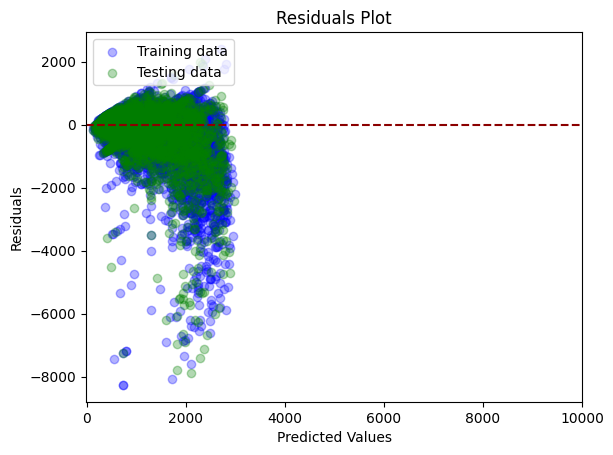

In [35]:
#we can plot the errors

plt.scatter(y_train_pred, y_train_pred-y_train, c="b", label="Training data",alpha=0.3)
plt.scatter(y_pred, y_pred-y_test, c="g", label="Testing data",alpha=0.3)
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=10000, color="darkred", linestyles='--')
plt.xlim([-10,10000])
plt.show()


### 3) Linear Regression

In [36]:
# Define the regressor and the parameters grid
regressor = LinearRegression()
parameters = {}

# Define the gridsearch
gs = GridSearchCV(regressor, parameters, cv=3, n_jobs = -1) # with no parameters it reduces to a CV

# Train the regressor
gs = gs.fit(X_train_scaled ,y_train) # also try with X_train_scaled and X_train_pca.iloc[:,:2] (depending on the number of components you have chosen)



# Summarize the results of the gridsearch
print('***GRIDSEARCH RESULTS***')
print(f"Best score: {gs.best_score_} using {gs.best_params_}")
#Returns the coefficient of determination R^2 of the prediction.

***GRIDSEARCH RESULTS***
Best score: 0.6744065597091676 using {}


In [37]:
# Predictions
best_model = gs.best_estimator_
y_train_pred = best_model.predict(X_train_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)
y_pred = best_model.predict(X_test_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)

In [38]:
# we can compare the train/test errors to identify overfitting
print("MAE train: ", metrics.mean_absolute_error(y_train, y_train_pred)) 
print("MSE train: ",metrics.mean_squared_error(y_train, y_train_pred))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2 train: ",metrics.r2_score(y_train, y_train_pred))

print("MAE test: ", metrics.mean_absolute_error(y_test, y_pred)) 
print("MSE test: ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2 test: ",metrics.r2_score(y_test, y_pred))

# Store the values for a later comparison
mae_lr = metrics.mean_absolute_error(y_test, y_pred)
mse_lr = metrics.mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_lr = metrics.r2_score(y_test, y_pred)

# No overfitting observed in these results

MAE train:  399.2624307742765
MSE train:  439823.22024837066
RMSE train:  663.1916919325594
r2 train:  0.6775357373504025
MAE test:  402.59109740676234
MSE test:  442882.8582580571
RMSE test:  665.4944464517018
r2 test:  0.6873325115926212


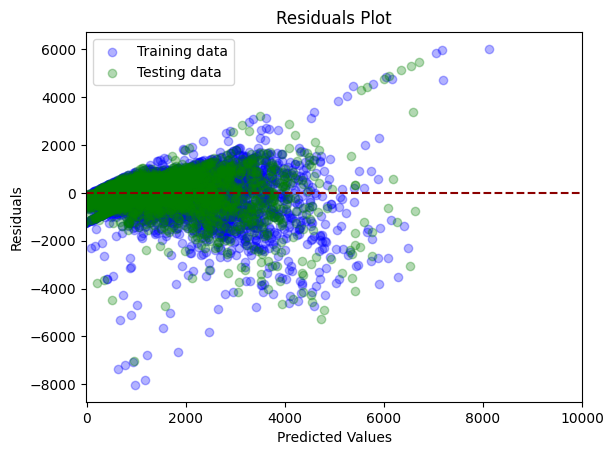

In [39]:
#we can plot the errors

plt.scatter(y_train_pred, y_train_pred-y_train, c="b", label="Training data",alpha=0.3)
plt.scatter(y_pred, y_pred-y_test, c="g", label="Testing data",alpha=0.3)
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=10000, color="darkred", linestyles='--')
plt.xlim([-10,10000])
plt.show()


### 4) Lasso

In [40]:
# Define the regressor and the parameters grid
regressor = Lasso()
parameters = {"alpha": [0.001,0.01,0.1,1,10,100]}

# Define the gridsearch
gs = GridSearchCV(regressor, parameters, cv=3, n_jobs = -1) # with no parameters it reduces to a CV

# Train the regressor
gs = gs.fit(X_train_scaled ,y_train) # also try with X_train_scaled and X_train_pca.iloc[:,:2] (depending on the number of components you have chosen)



# Summarize the results of the gridsearch
print('***GRIDSEARCH RESULTS***')
print(f"Best score: {gs.best_score_} using {gs.best_params_}")
#Returns the coefficient of determination R^2 of the prediction.

***GRIDSEARCH RESULTS***
Best score: 0.6745003634737771 using {'alpha': 1}


In [41]:
# Predictions
best_model = gs.best_estimator_
y_train_pred = best_model.predict(X_train_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)
y_pred = best_model.predict(X_test_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)

In [42]:
# we can compare the train/test errors to identify overfitting
print("MAE train: ", metrics.mean_absolute_error(y_train, y_train_pred)) 
print("MSE train: ",metrics.mean_squared_error(y_train, y_train_pred))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2 train: ",metrics.r2_score(y_train, y_train_pred))

print("MAE test: ", metrics.mean_absolute_error(y_test, y_pred)) 
print("MSE test: ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2 test: ",metrics.r2_score(y_test, y_pred))

# Store the values for a later comparison
mae_lasso = metrics.mean_absolute_error(y_test, y_pred)
mse_lasso = metrics.mean_squared_error(y_test, y_pred)
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_lasso = metrics.r2_score(y_test, y_pred)

# No overfitting as expected from lasso

MAE train:  398.86058846711336
MSE train:  439880.4628645693
RMSE train:  663.2348474443794
r2 train:  0.6774937689022288
MAE test:  402.07812191703266
MSE test:  442525.67637083604
RMSE test:  665.2260340446968
r2 test:  0.6875846757066745


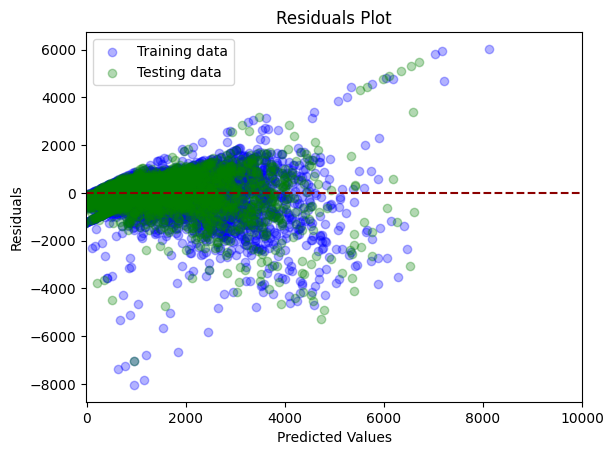

In [43]:
#we can plot the errors

plt.scatter(y_train_pred, y_train_pred-y_train, c="b", label="Training data",alpha=0.3)
plt.scatter(y_pred, y_pred-y_test, c="g", label="Testing data",alpha=0.3)
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=10000, color="darkred", linestyles='--')
plt.xlim([-10,10000])
plt.show()


### 5) Ridge

In [44]:
# Define the regressor and the parameters grid
regressor = Ridge()
parameters = {"alpha": [0.001, 0.01, 0.1, 1, 10, 100]}

# Define the gridsearch
gs = GridSearchCV(regressor, parameters, cv=3, n_jobs = -1) # with no parameters it reduces to a CV

# Train the regressor
gs = gs.fit(X_train_scaled ,y_train) # also try with X_train_scaled and X_train_pca.iloc[:,:2] (depending on the number of components you have chosen)



# Summarize the results of the gridsearch
print('***GRIDSEARCH RESULTS***')
print(f"Best score: {gs.best_score_} using {gs.best_params_}")
#Returns the coefficient of determination R^2 of the prediction.

***GRIDSEARCH RESULTS***
Best score: 0.6744074391055025 using {'alpha': 10}


In [45]:
# Predictions
best_model = gs.best_estimator_
y_train_pred = best_model.predict(X_train_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)
y_pred = best_model.predict(X_test_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)

In [46]:
# we can compare the train/test errors to identify overfitting
print("MAE train: ", metrics.mean_absolute_error(y_train, y_train_pred)) 
print("MSE train: ",metrics.mean_squared_error(y_train, y_train_pred))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2 train: ",metrics.r2_score(y_train, y_train_pred))

print("MAE test: ", metrics.mean_absolute_error(y_test, y_pred)) 
print("MSE test: ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2 test: ",metrics.r2_score(y_test, y_pred))

# Store the values for a later comparison
mae_ridge = metrics.mean_absolute_error(y_test, y_pred)
mse_ridge = metrics.mean_squared_error(y_test, y_pred)
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_ridge = metrics.r2_score(y_test, y_pred)

# As expected, no overfitting with ridge

MAE train:  399.17226219234624
MSE train:  439824.3045636866
RMSE train:  663.192509429718
r2 train:  0.6775349423652295
MAE test:  402.5373393340542
MSE test:  442853.1057572729
RMSE test:  665.472092395521
r2 test:  0.6873535163335376


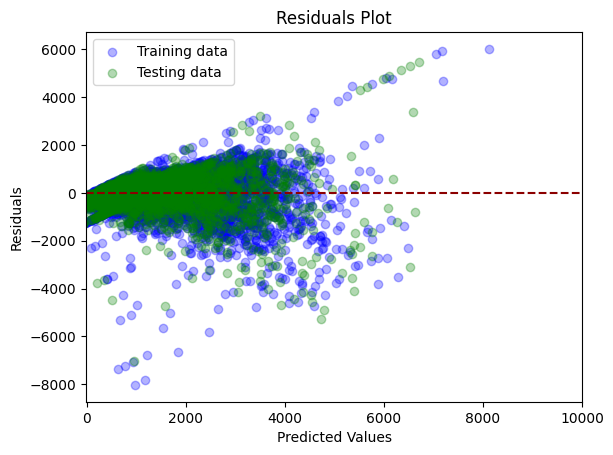

In [47]:
#we can plot the errors

plt.scatter(y_train_pred, y_train_pred-y_train, c="b", label="Training data",alpha=0.3)
plt.scatter(y_pred, y_pred-y_test, c="g", label="Testing data",alpha=0.3)
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=10000, color="darkred", linestyles='--')
plt.xlim([-10,10000])
plt.show()


### 6) Decision Tree Regressor

In [48]:
# Note: this might take some time to run, please be patient

# Define the regressor and the parameters grid
regressor = DecisionTreeRegressor()
parameters = {'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'criterion': ['squared_error', 'absolute_error']}

# Define the gridsearch
gs = GridSearchCV(regressor, parameters, cv=3, n_jobs = -1) # with no parameters it reduces to a CV

# Train the regressor
gs = gs.fit(X_train_scaled ,y_train) # also try with X_train_scaled and X_train_pca.iloc[:,:2] (depending on the number of components you have chosen)



# Summarize the results of the gridsearch
print('***GRIDSEARCH RESULTS***')
print(f"Best score: {gs.best_score_} using {gs.best_params_}")
#Returns the coefficient of determination R^2 of the prediction.

***GRIDSEARCH RESULTS***
Best score: 0.7187086675219415 using {'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [49]:
# Predictions
best_model = gs.best_estimator_
y_train_pred = best_model.predict(X_train_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)
y_pred = best_model.predict(X_test_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)

In [50]:
# we can compare the train/test errors to identify overfitting
print("MAE train: ", metrics.mean_absolute_error(y_train, y_train_pred)) 
print("MSE train: ",metrics.mean_squared_error(y_train, y_train_pred))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2 train: ",metrics.r2_score(y_train, y_train_pred))

print("MAE test: ", metrics.mean_absolute_error(y_test, y_pred)) 
print("MSE test: ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2 test: ",metrics.r2_score(y_test, y_pred))

# Store the values for a later comparison
mae_dt = metrics.mean_absolute_error(y_test, y_pred)
mse_dt = metrics.mean_squared_error(y_test, y_pred)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_dt = metrics.r2_score(y_test, y_pred)

# These results suggest a bit of overfitting

MAE train:  229.8090176530612
MSE train:  232106.95152331566
RMSE train:  481.7747933664812
r2 train:  0.8298266359458107
MAE test:  327.9087807142857
MSE test:  395878.3192086027
RMSE test:  629.1886197386303
r2 test:  0.7205168873125232


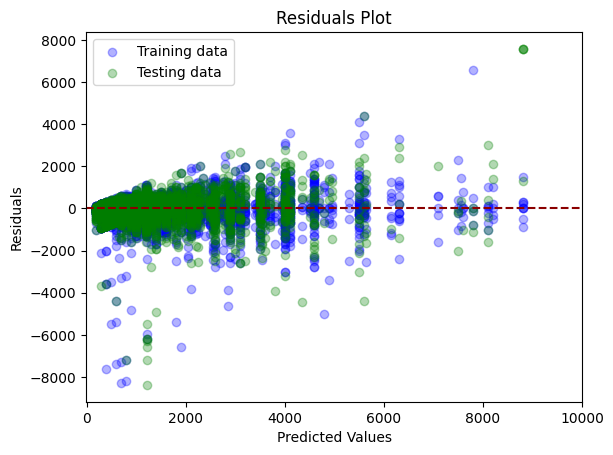

In [51]:
#we can plot the errors

plt.scatter(y_train_pred, y_train_pred-y_train, c="b", label="Training data",alpha=0.3)
plt.scatter(y_pred, y_pred-y_test, c="g", label="Testing data",alpha=0.3)
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=10000, color="darkred", linestyles='--')
plt.xlim([-10,10000])
plt.show()


### 7) Random Forest Regressor

In [52]:
# Note: this might take some time to run, please be patient

# Define the regressor and the parameters grid
regressor = RandomForestRegressor()
parameters = {"n_estimators":[10, 50 ,100],
              'max_depth': [None, 10, 20],
              "min_samples_leaf": [1,5,10],
              "random_state" : [42]}

# Define the gridsearch
gs = GridSearchCV(regressor, parameters, cv=3, n_jobs = -1) # with no parameters it reduces to a CV

# Train the regressor
gs = gs.fit(X_train_scaled ,y_train) # also try with X_train_scaled and X_train_pca.iloc[:,:2] (depending on the number of components you have chosen)



# Summarize the results of the gridsearch
print('***GRIDSEARCH RESULTS***')
print(f"Best score: {gs.best_score_} using {gs.best_params_}")
#Returns the coefficient of determination R^2 of the prediction.

***GRIDSEARCH RESULTS***
Best score: 0.7940094274613813 using {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 42}


In [53]:
# Predictions
best_model = gs.best_estimator_
y_train_pred = best_model.predict(X_train_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)
y_pred = best_model.predict(X_test_scaled) #also try with X_test_scaled and X_test_pca.iloc[:,:2] (depending on the number of components you have chosen)

In [54]:
# we can compare the train/test errors to identify overfitting
print("MAE train: ", metrics.mean_absolute_error(y_train, y_train_pred)) 
print("MSE train: ",metrics.mean_squared_error(y_train, y_train_pred))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("r2 train: ",metrics.r2_score(y_train, y_train_pred))

print("MAE test: ", metrics.mean_absolute_error(y_test, y_pred)) 
print("MSE test: ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2 test: ",metrics.r2_score(y_test, y_pred))

# Store the values for a later comparison
mae_rf = metrics.mean_absolute_error(y_test, y_pred)
mse_rf = metrics.mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_rf = metrics.r2_score(y_test, y_pred)

# These results suggest overfitting
# we can address that by techniques like regularization or feature selection
# For example, we can use Lasso regression for feature selection, as it automatically performs variable selection by setting some coefficients to zero. It can effectively eliminate irrelevant predictors from the model, reducing model complexity and improving interpretability.

MAE train:  109.993047868985
MSE train:  40247.70181258347
RMSE train:  200.61829879794982
r2 train:  0.9704916773584473
MAE test:  278.42100036309915
MSE test:  264334.9541140852
RMSE test:  514.1351516032387
r2 test:  0.8133841835147902


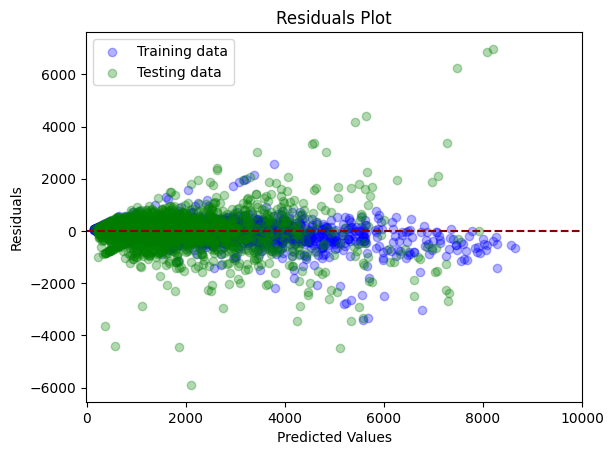

In [55]:
#we can plot the errors

plt.scatter(y_train_pred, y_train_pred-y_train, c="b", label="Training data",alpha=0.3)
plt.scatter(y_pred, y_pred-y_test, c="g", label="Testing data",alpha=0.3)
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=10000, color="darkred", linestyles='--')
plt.xlim([-10,10000])
plt.show()


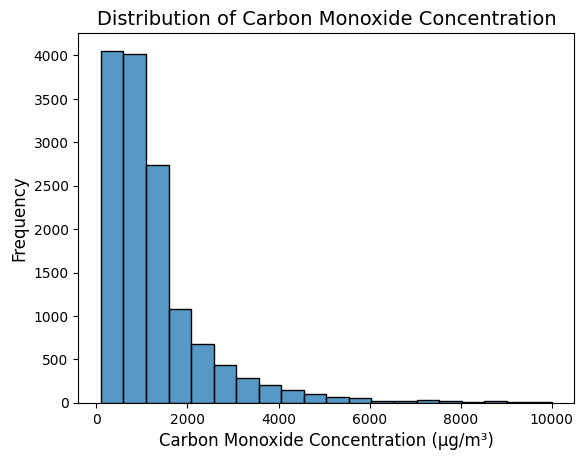

In [56]:
sns.histplot(df['carb_monox'],bins=20)
plt.title('Distribution of Carbon Monoxide Concentration', fontsize=14)
plt.xlabel('Carbon Monoxide Concentration (μg/m³)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Limitations and Recommendations:**

This models seems to do well predicting the target variable when it has small values, However, it does not do a very good job for larger values of the target variable!

The divergence of residuals for larger predicted values in the testing data indicates that the model is making larger errors for these observations. This might mean that the model is biased towards underestimating (or overestimating) the target variable across a certain range of values. 

We can also observe that residuals for training set are generally smaller than that for testing set in the whole range of the target variable. This indicates that the model is overfitting and does not have very good generalization on new, unseen data!

We considered whether regularization techniques such as Ridge or Lasso regression could help mitigate overfitting and improve generalization performance, but they did not.

To address this issue, we can consider refining our model by incorporating additional features, adjusting model hyperparameters, or using more advanced modeling techniques to improve its predictive accuracy and reduce bias. 

Additionally, EDA phase showed that we have some mlticoliniarity in our dataset. We can try training the model using only a subset of predictors to reduce model complexity to improve it's generalizability. We could consider using techniques such as forward selection or backward elimination to identify and select a subset of predictors that are most relevant to the target variable.

## Conclusion

In [57]:
# Let's compare the different models
regression_scores = {'Model':['KNN', 'SVR', 'Linear','Lasso','Ridge','DT','RF' ],
                         'MAE':[mae_knn, mae_svr, mae_lr, mae_lasso, mae_ridge, mae_dt, mae_rf],
                         'MSE':[mse_knn, mse_svr, mse_lr, mse_lasso, mse_ridge, mse_dt, mse_rf],
                         'RMSE':[rmse_knn, rmse_svr, rmse_lr, rmse_lasso, rmse_ridge, rmse_dt, rmse_rf],
                         'R2':[r2_knn, r2_svr, r2_lr, r2_lasso, r2_ridge, r2_dt, r2_rf]
                         }

scores_df = pd.DataFrame(regression_scores)
scores_df.set_index('Model', inplace=True)
scores_df.index.name = None
scores_df

,MAE,MSE,RMSE,R2
KNN,334.134327,360853.553187,600.710873,0.745244
SVR,413.745255,689798.925176,830.541345,0.513014
Linear,402.591097,442882.858258,665.494446,0.687333
Lasso,402.078122,442525.676371,665.226034,0.687585
Ridge,402.537339,442853.105757,665.472092,0.687354
DT,327.908781,395878.319209,629.188620,0.720517
RF,278.421000,264334.954114,514.135152,0.813384


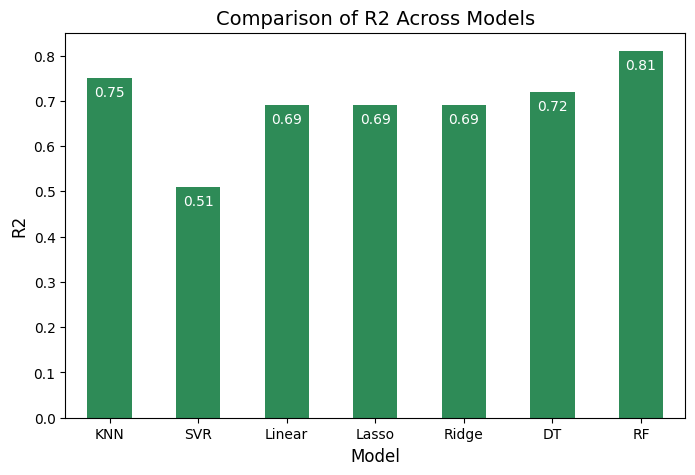

In [58]:
# Let's visualize this comparison
ax = scores_df['R2'].round(2).plot.bar(rot=0, figsize=(8, 5),color='#2E8B57')

plt.title('Comparison of R2 Across Models', fontsize=14)
plt.ylabel('R2', fontsize=12)
plt.xlabel('Model', fontsize=12)

# Annotate the bars
for i, r2_score in enumerate(scores_df['R2'].round(2)):
    ax.annotate(f'{r2_score}', (i, r2_score - 0.04), color='white', ha='center')

plt.show()

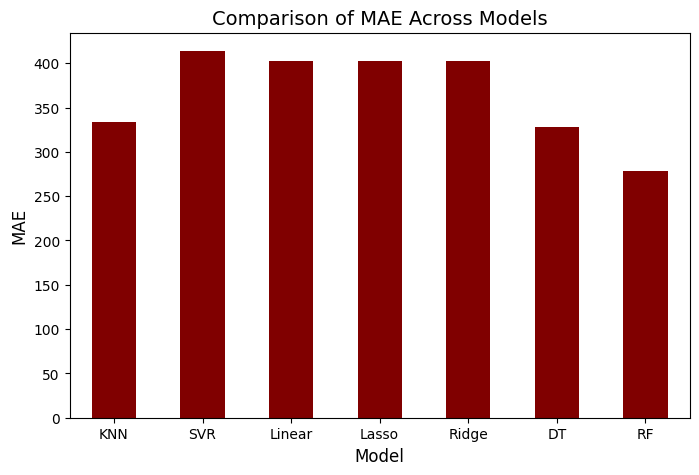

In [59]:
scores_df['MAE'].plot.bar(rot=0, figsize=(8, 5),color='#800000')
plt.title('Comparison of MAE Across Models', fontsize=14)
plt.ylabel('MAE', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.show()

Among all models trained for this project, Random Forest seems to perform best as it shows highest R2 value (0.81), and the lowest MAE (278) relative to other models!

While an R-squared of 0.81 is decent, there may still be room for improvement. We can explore ways to enhance the model's performance further by refining feature selection, engineering new features, trying different algorithms, or tuning hyperparameters.